In [ ]:
!pip install glob2

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

In [ ]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="your api key")
# dataset = project.version(9).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.231, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to littering-1 in yolov8:: 100%|██████████| 1166/1166 [00:04<00:00, 289.65it/s]


In [ ]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [ ]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [ ]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))

    all_images.sort()

    num_images = len(all_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                bbox_values = bbox_string.split(' ')
                if len(bbox_values) >= 4:
                  x_c, y_c, w, h = map(float, bbox_values[:4])
                # x_c = float(x_c)
                # y_c = float(y_c)
                # w = float(w)
                # h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

In [ ]:
plot(
    image_paths='/content/littering-1/train/images',
    label_paths='/content/littering-1/train/labels',
    num_samples=4,
)
bbox_string = label_line[2:]
bbox_values = bbox_string.split(' ')

# Ensure that there are at least four values in bbox_values
if len(bbox_values) >= 4:
    x_c, y_c, w, h = map(float, bbox_values[:4])
    # Continue with the rest of your code
else:
    # Handle the case where there are not enough values in bbox_values
    print("Error: Insufficient values in bbox_string")


ValueError: ignored

<Figure size 1500x1200 with 0 Axes>

In [ ]:
%%writefile pothole_v8.yaml
path: '/content/PotholeDetection-9'
train: '/content/PotholeDetection-9/train/images'
val: '/content/PotholeDetection-9/valid/images'

# class names
names:
  0: 'pothole'

Writing pothole_v8.yaml


In [ ]:
# Sample training for 5 epoch.
EPOCHS = 5
!yolo task=detect mode=train model=yolov8n.pt imgsz=1280 data=pothole_v8.yaml epochs={EPOCHS} batch=8 name=/content/drive/MyDrive/yolov8n_v8_50e

100% 6.23M/6.23M [00:00<00:00, 75.6MB/s]
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=pothole_v8.yaml, epochs=5, patience=50, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_50e2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/yolov8n_v8_50e/weights/best.pt name=yolov8n_eval data=pothole_v8.yaml

WARNING ⚠️ /content/drive/MyDrive/yolov8n_v8_50e/weights/best.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['omegaconf'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=0cbe2605965871c05d486eb0b4d885f2f4b93f25373c557aaa662701ab70041d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_shihifq/wheels/12/

In [ ]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/yolov8n_v8_50e/weights/best.pt \
source=/content/PotholeDetection-9/valid/images \
imgsz=1280 \
name=yolov8n_v8_50e_infer1280 \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/153 /content/PotholeDetection-9/valid/images/102_jpg.rf.fa694fbf79160d73a98934da7aa8f8a3.jpg: 864x1280 5 potholes, 198.3ms
image 2/153 /content/PotholeDetection-9/valid/images/106_jpg.rf.7626885e558f050a65a2352075defbc0.jpg: 736x1280 3 potholes, 99.5ms
image 3/153 /content/PotholeDetection-9/valid/images/107_jpg.rf.122654e82975b84b0db912f9a9ba9dd6.jpg: 768x1280 1 pothole, 108.0ms
image 4/153 /content/PotholeDetection-9/valid/images/114_jpg.rf.f2eacabb5cacd25fec0c4743009d6aee.jpg: 864x1280 5 potholes, 26.8ms
image 5/153 /content/PotholeDetection-9/valid/images/115_jpg.rf.27eb212bbe8733a7e8f6167f40d2525a.jpg: 960x1280 1 pothole, 266.8ms
image 6/153 /content/PotholeDetection-9/valid/images

In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

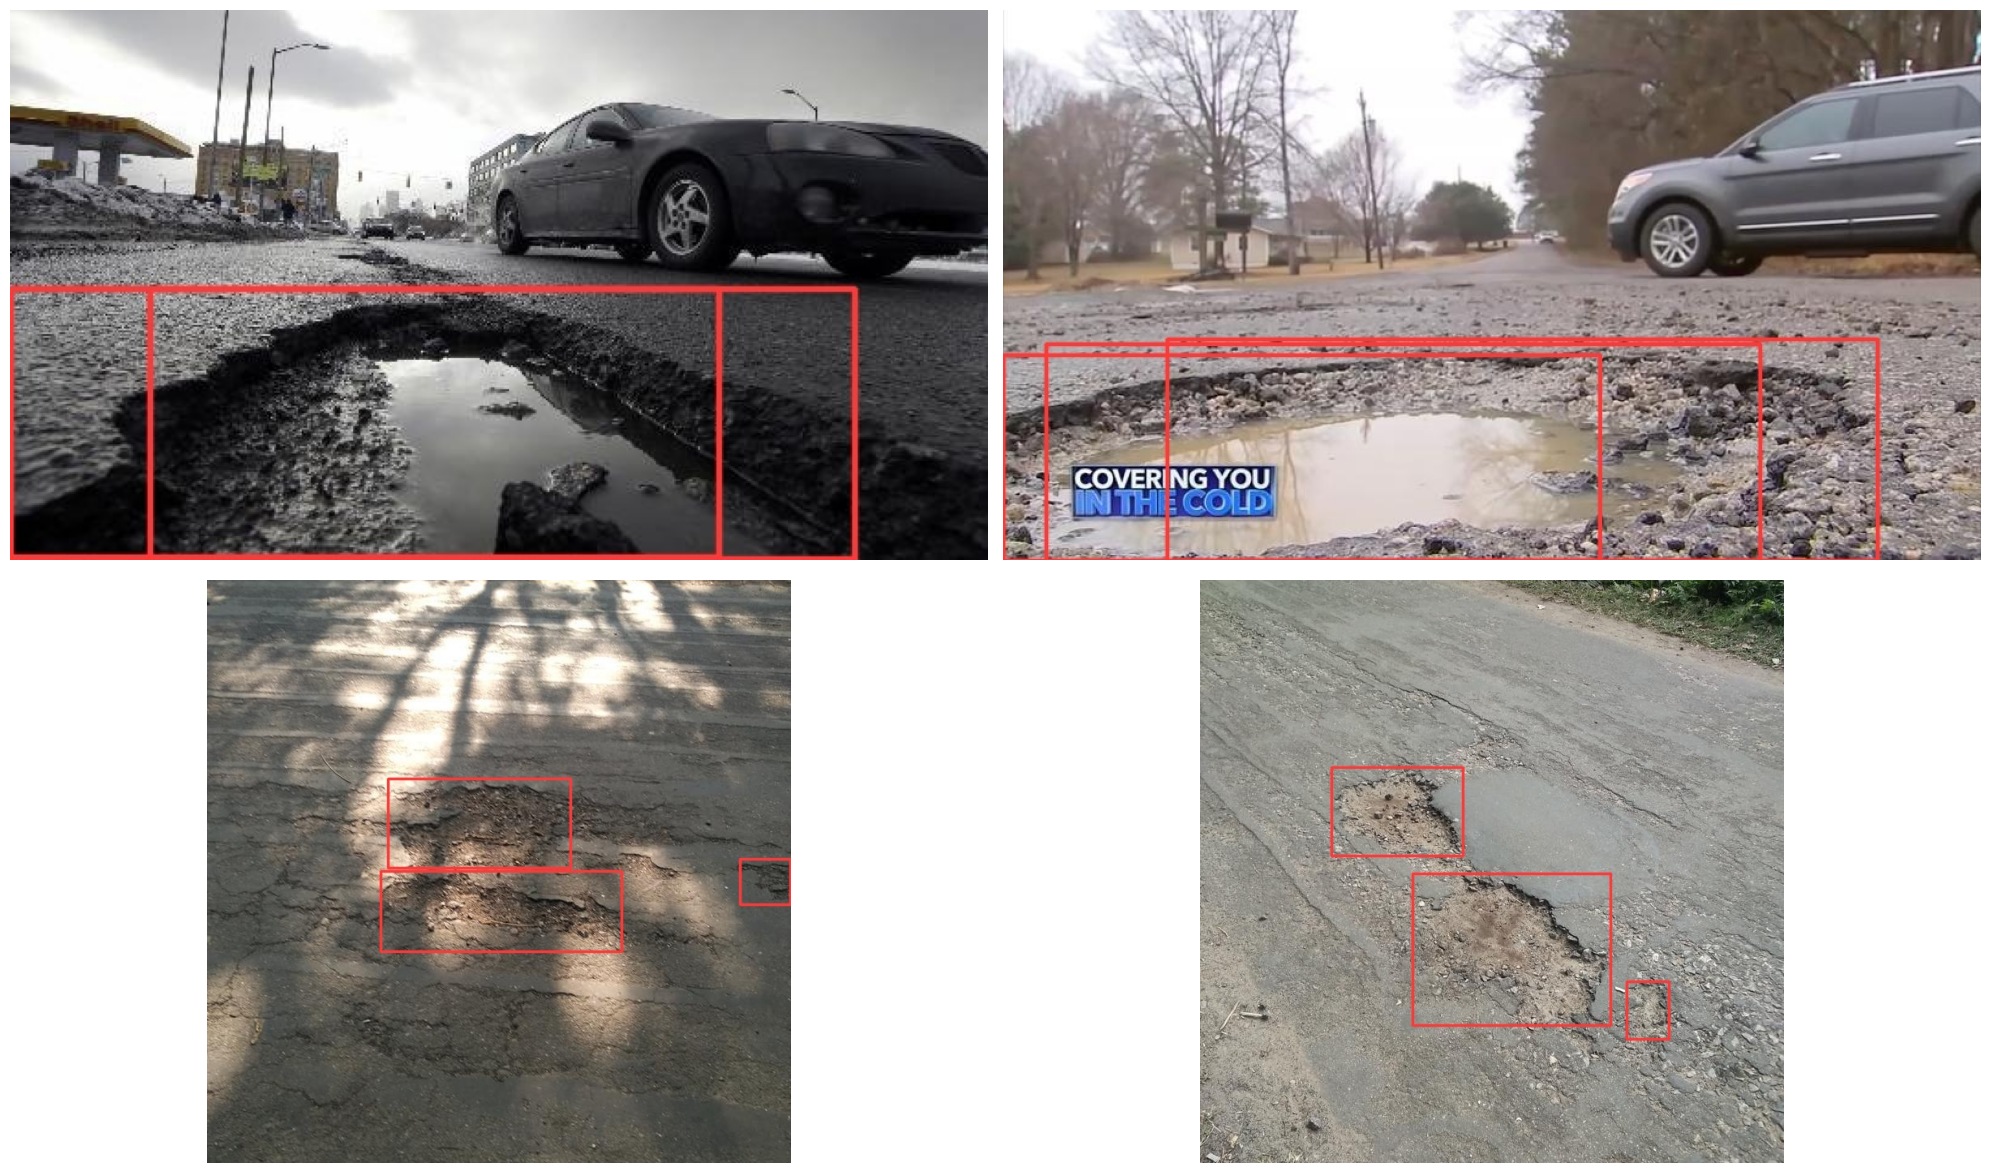

In [ ]:
visualize('/content/runs/detect/yolov8n_v8_50e_infer1280')

In [ ]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/yolov8n_v8_50e/weights/best.pt \
source=/content/PotholeDetection-9/test/images \
imgsz=1280 \
name=yolov8n_v8_50e_infer1280_test \
hide_labels=True
# show_labels=False

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/77 /content/PotholeDetection-9/test/images/10_jpg.rf.e22cd1708648d299964d37e2ae2d53a0.jpg: 736x1280 12 potholes, 93.6ms
image 2/77 /content/PotholeDetection-9/test/images/122_jpg.rf.54200947c45b61501fa7920d423df5ec.jpg: 864x1280 1 pothole, 55.1ms
image 3/77 /content/PotholeDetection-9/test/images/123_jpg.rf.7fc8d7c3e0997eda6926c8a1c94964c4.jpg: 960x1280 1 pothole, 56.7ms
image 4/77 /content/PotholeDetection-9/test/images/12_jpg.rf.a12ef3b9b98262852b5e80b7d05a6c0f.jpg: 928x1280 3 potholes, 58.1ms
image 5/77 /content/PotholeDetection-9/test/images/138_jpg.rf.4ded4d9e3eee046723f8f62cb8e5514a.jpg: 864x1280 3 potholes, 14.9ms
image 6/77 /content/PotholeDetection-9/test/images/141_jpg.rf.3fa8

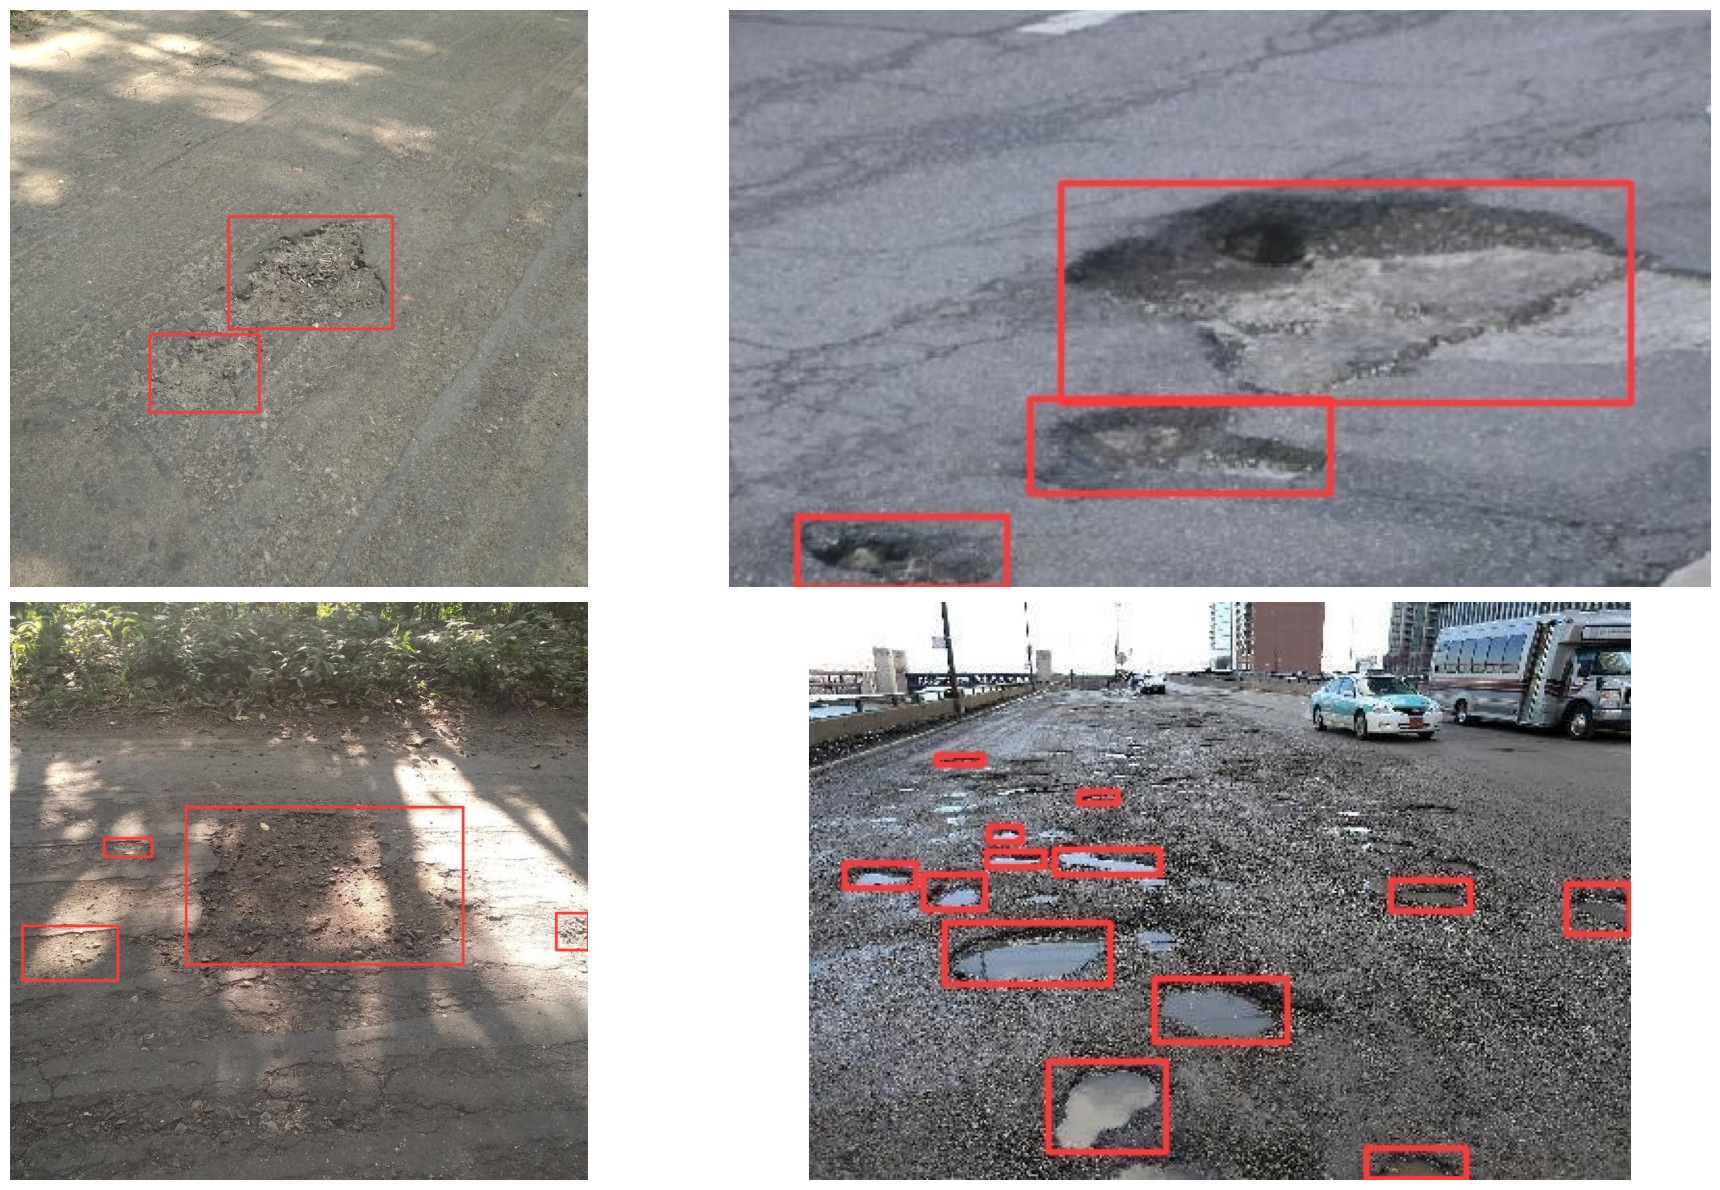

In [ ]:
visualize('/content/runs/detect/yolov8n_v8_50e_infer1280_test')

In [ ]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/yolov8n_v8_50e/weights/best.pt \
source=/content/xy.mp4 \
imgsz=1280 \
name=yolov8n_v8_50e_infer1280_test_2 \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/350) /content/xy.mp4: 736x1280 1 pothole, 101.3ms
video 1/1 (2/350) /content/xy.mp4: 736x1280 1 pothole, 12.3ms
video 1/1 (3/350) /content/xy.mp4: 736x1280 5 potholes, 12.3ms
video 1/1 (4/350) /content/xy.mp4: 736x1280 5 potholes, 12.2ms
video 1/1 (5/350) /content/xy.mp4: 736x1280 5 potholes, 12.3ms
video 1/1 (6/350) /content/xy.mp4: 736x1280 4 potholes, 12.3ms
video 1/1 (7/350) /content/xy.mp4: 736x1280 4 potholes, 12.2ms
video 1/1 (8/350) /content/xy.mp4: 736x1280 5 potholes, 12.2ms
video 1/1 (9/350) /content/xy.mp4: 736x1280 5 potholes, 12.2ms
video 1/1 (10/350) /content/xy.mp4: 736x1280 5 potholes, 12.3ms
video 1/1 (11/350) /content/xy.mp4: 736x1280 5 potholes, 12.3ms
video 1/1

In [ ]:
visualize('/content/runs/detect/yolov8n_v8_50e_infer1280_test_2')

<Figure size 2000x1200 with 0 Axes>

In [ ]:
import cv2
from IPython.display import display, HTML
from base64 import b64encode

# Replace with the path to your YOLOv8 output video file (.avi)
video_path = '/content/runs/detect/yolov8n_v8_50e_infer1280_test_2/xy.avi'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Function to display the video in Colab
def show_video(video_path):
    video_file = open(video_path, "rb").read()
    video_url = "data:video/avi;base64," + b64encode(video_file).decode()
    display(HTML(f'<video controls alt="output video" src="{video_url}"></video>'))

# Show the video in Colab
show_video(video_path)

# Release the video capture object
cap.release()


In [ ]:
import os

from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
# VIDEOS_DIR = os.path.join('.', 'videos')

# video_path = os.path.join(VIDEOS_DIR, 'xy.mp4')
video_path= '/content/xy.mp4'

video_path_out = '/content/{}_out.mp4'.format('xy')

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# Load a model
model = YOLO('/content/drive/MyDrive/yolov8n_v8_50e/weights/best.pt')  # load a custom model

threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()


0: 736x1280 1 pothole, 86.3ms
Speed: 6.3ms preprocess, 86.3ms inference, 2.9ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 pothole, 12.3ms
Speed: 5.7ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 5 potholes, 12.3ms
Speed: 5.1ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 5 potholes, 12.2ms
Speed: 5.3ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 5 potholes, 12.3ms
Speed: 3.9ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 4 potholes, 12.3ms
Speed: 3.8ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 4 potholes, 12.2ms
Speed: 4.1ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 5 potholes, 12.3ms
Speed: 4.0ms preprocess, 12.3ms inference, 1.5ms postprocess

error: ignored

### To download temp folders

In [ ]:
!zip -r /content/runs.zip /content/runs/

In [ ]:
!zip -r /content/PotholeDetection-9.zip /content/PotholeDetection-9/